# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Student Details

Student Name and ID: Saachi Shivhare, 1001830083

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,5/2/1953,GA,NaN,Tornado,Tornado,5/2/1953,5/2/1953,6/1/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,5/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,5/15/1953,5/15/1953,1/1/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,5/29/1953,LA,NaN,Flood,Flood,5/29/1953,5/29/1953,2/1/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,6/2/1953,MI,NaN,Tornado,Tornado,6/2/1953,6/2/1953,2/1/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,6/6/1953,MT,NaN,Flood,Floods,6/6/1953,6/6/1953,12/1/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n",df_data.info()) # or for more detail we can give df_data.info
                                                                           # without parathesis

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = len(df_data) #length for rows
num_cols = len(df_data.columns) #length of each coloums to get no. of columns
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 

print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n",df_data['Start Date'].describe()) 

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
disaster_title_list  = df_data['Disaster Title'].unique()
unique_county_list = df_data['County'].unique()

print ("\n\n >>Task 1-d:")
print(disaster_title_list)
print("#####################################################")
print(unique_county_list) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Declaration Number                46185 non-null  object
 1   Declaration Type                  46185 non-null  object
 2   Declaration Date                  46185 non-null  object
 3   State                             46185 non-null  object
 4   County                            45988 non-null  object
 5   Disaster Type                     46185 non-null  object
 6   Disaster Title                    46185 non-null  object
 7   Start Date                        46185 non-null  object
 8   End Date                          45843 non-null  object
 9   Close Date                        35210 non-null  object
 10  Individual Assistance Program     46185 non-null  object
 11  Individuals & Households Program  46185 non-null  object
 12  Public Assistance 

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [17]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days
df_data_temp = df_data
df_data_temp["Start Date"] = pd.to_datetime(df_data_temp["Start Date"]) #Converting to "to date time"
df_data_temp["End Date"] = pd.to_datetime(df_data_temp["End Date"]) #same convertion
#df_data1["End Date"]
# conditions for 120 days and type to be emergency
A = df_data[(df_data_temp["End Date"] - df_data_temp["Start Date"] > '120 days' ) & (df_data_temp['Declaration Type'] == 'Emergency')]
#Unique values as mentioned in question
Emergency_greater_120 = A["Disaster Title"].unique()
print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))

# 8 points
#Task 2-b: Find out the total number of declarations between 1998 and 1999 where Individual Assistance 
#Program was provided for the state of Texas.
df_data_temp["Year"] =pd.DatetimeIndex(df_data_temp["Declaration Date"]).year #Date to time index convertion to get the year
B = df_data
B = B[(df_data_temp["Year"]>=1998) & (df_data_temp["Year"]<=1999)]
B = B[(B["State"] == "TX") & (B["Individual Assistance Program"]=="Yes")]
num_declarations_1998_1999 = len(B)

print ("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))

# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
n = 10
C = df_data[df_data['Declaration Type'] == 'Emergency'] #fetch with respect to Emergency
C.dropna()
C = C.groupby('County').count().sort_values(by='Declaration Number',ascending=False).iloc[0:n,:] #Arranged in descending
# reset the index from 0 to N
C = C.reset_index()

D = df_data[df_data["Declaration Type"] == 'Disaster'] #Similarly filtered with respect to Disaster
D.dropna()
D = D.groupby('County').count().sort_values(by='Declaration Number',ascending=False).iloc[0:n,:] #Arranged in descending
D = D.reset_index()

top10_disasters=D["County"] #<-- #for Disaster
top10_emergencies=C["County"] #<-- #for Emergency

print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Fire' 'Extreme Fire Hazards' 'West Nile Virus'
 'Drought' 'Wildfires']


>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 322


>>Task 2-c: top 10 counties with the most disasters for all years are: 
0    Washington County
1     Jefferson County
2       Jackson County
3      Franklin County
4       Lincoln County
5          Clay County
6       Madison County
7    Montgomery County
8        Monroe County
9        Marion County
Name: County, dtype: object


>>Task 2-c: top 10 counties with the most emergencies for all years are: 
0    Washington County
1      Franklin County
2       Jackson County
3     Jefferson County
4    Montgomery County
5        Monroe County
6       Lincoln County
7       Madison County
8        Warren County
9        Marion County
Name: County, dtype: object


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

Text(0.5, 1.0, 'Representing Declaration Type')

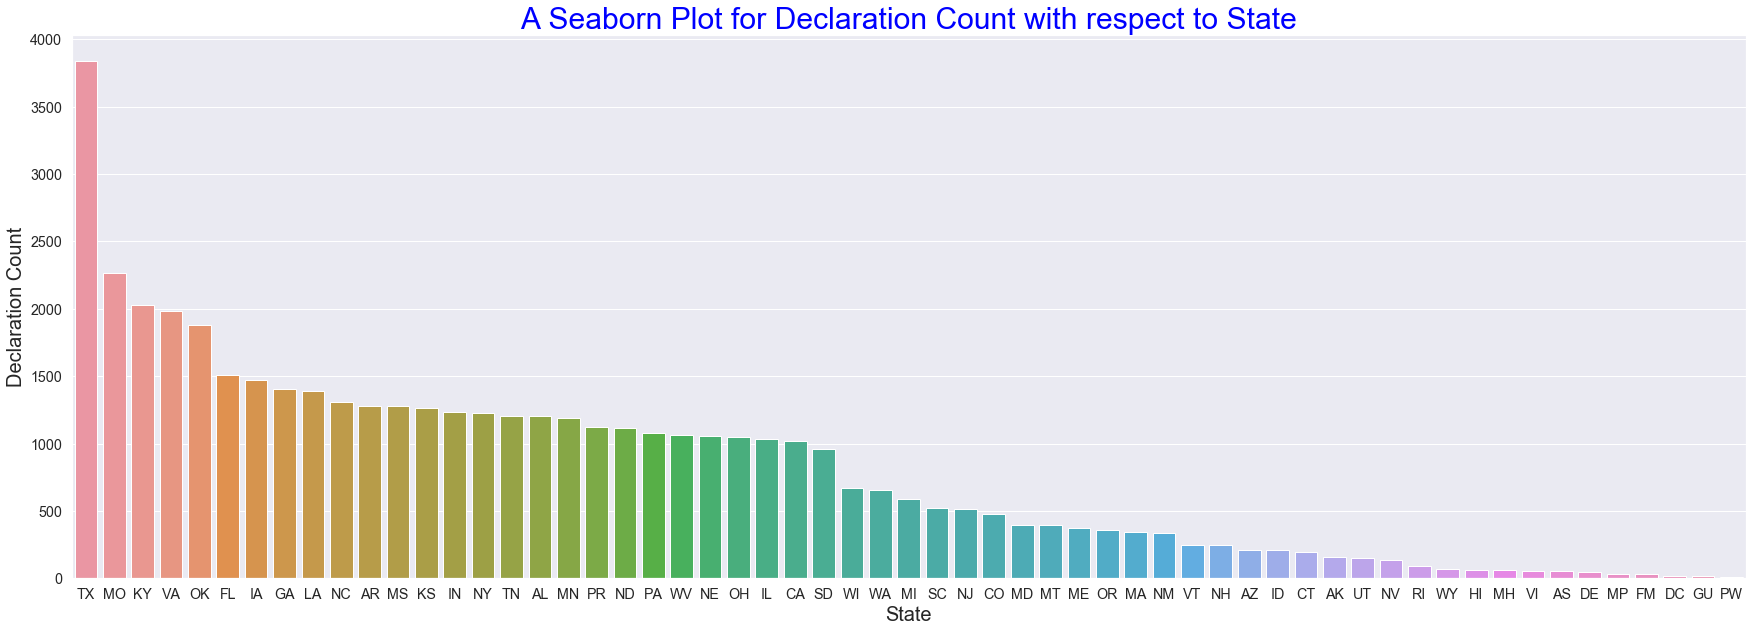

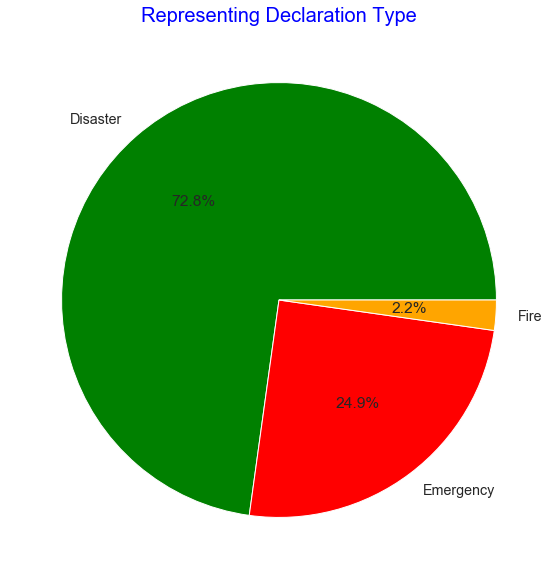

In [18]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
plt.figure(figsize=(30,10))
sns.barplot(x = df_data["State"].value_counts().index, y= df_data["State"].value_counts().values)
plt.xlabel('State',fontsize = 20)
plt.ylabel('Declaration Count',fontsize = 20)
plt.title("A Seaborn Plot for Declaration Count with respect to State", color = "Blue", fontsize =30)
#########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that represents Declaration type.
#########################begin code for Task 3-b 
colors=['green','red','orange']
plt.figure(figsize=(10,10))
plt.pie(df_data['Declaration Type'].value_counts().values,labels=df_data['Declaration Type'].value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('Representing Declaration Type',color='Blue',fontsize=20)
#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

My Explanation:

As a Data Scientist wannabe :). When I set the filter to the CSV file and looked into the dataset. I wan't filter the data with
respect to the Decleration type i.e. I want to know how much count was there in different State for different decleration Type 
Hence, after setting the filter for Disaster the count was: From overall dataset(46185) 33630 was "Disaster" Decleration Type
11520 was "Emergency" Decleration type and 1035 was "Fire" Decleration type.
Now let us visualize it with the help of matplotlib and seaborn

Text(0.5, 1.0, 'Vizualizing')

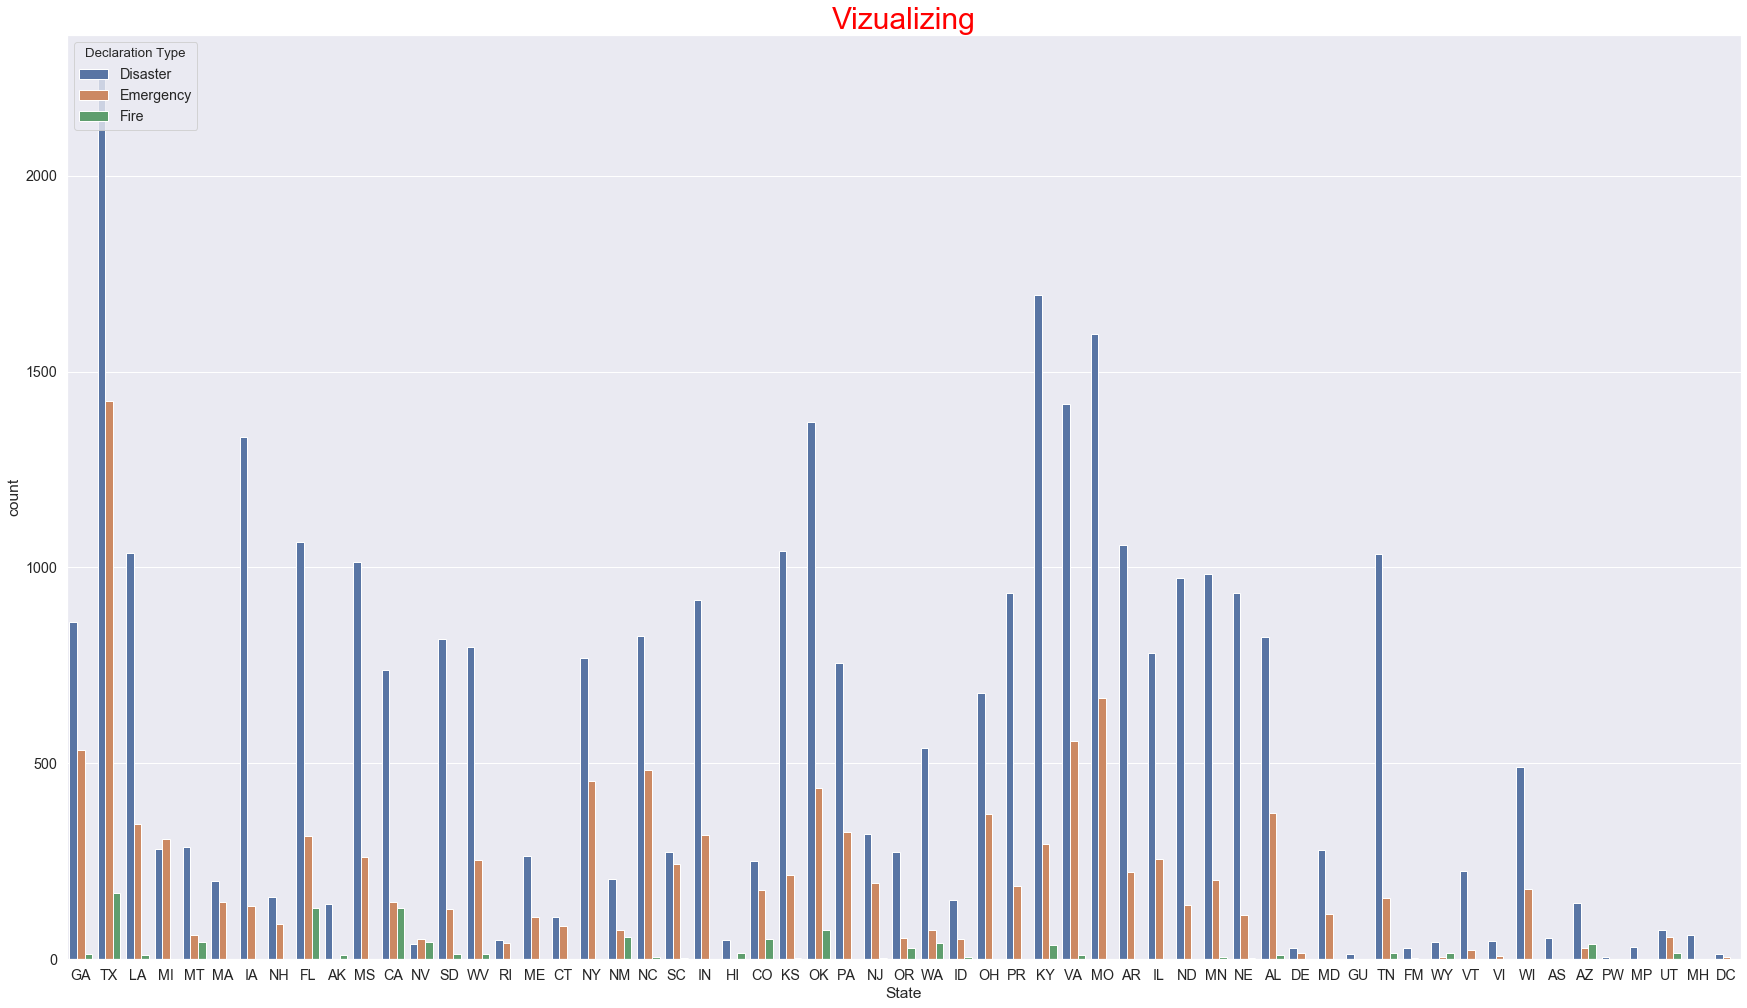

In [19]:
#########################begin code for Task 4
plt.figure(figsize=(30,17))
sns.countplot(x="State",hue="Declaration Type",data = df_data)
plt.title("Vizualizing",fontsize = 30,color = 'red')
#########################end code for Task 4

Lets visualize the Declaration Type in more depth on basis of Disaster Type:
I.e. Let us look into the percentages of Disaster type with respect to each other.

Text(0.5, 1.0, 'Vizualizing the Emergency type')

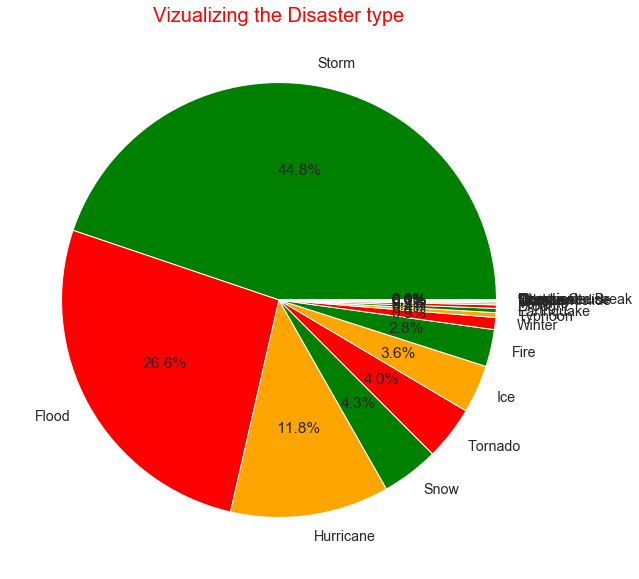

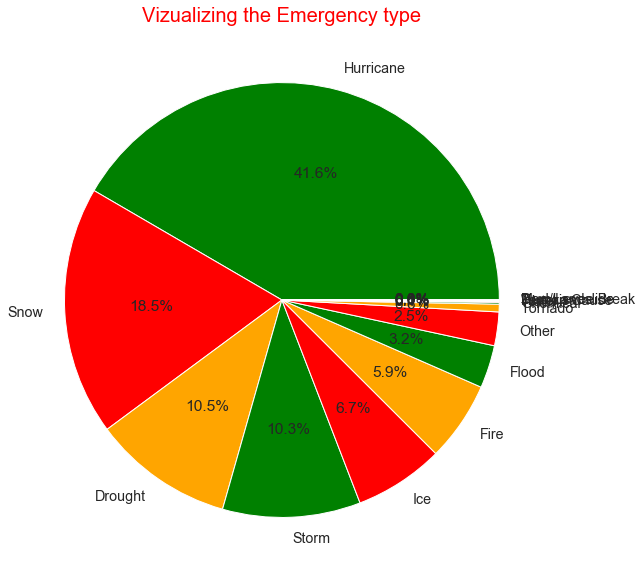

In [20]:
plt.figure(figsize=(10,10))
df_disaster = df_data[df_data['Declaration Type']=='Disaster']
#df_disaster
plt.pie(df_disaster['Disaster Type'].value_counts().values,labels=df_disaster['Disaster Type'].value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title("Vizualizing the Disaster type",fontsize = 20,color = 'red')

plt.figure(figsize=(10,10))
df_emergency = df_data[df_data['Declaration Type']=='Emergency']
#df_disaster
plt.pie(df_emergency['Disaster Type'].value_counts().values,labels=df_emergency['Disaster Type'].value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title("Vizualizing the Emergency type",fontsize = 20,color = 'red')

Text(0.5, 1.0, 'Vizualizing ...only FIRE!! (Hence 100%)')

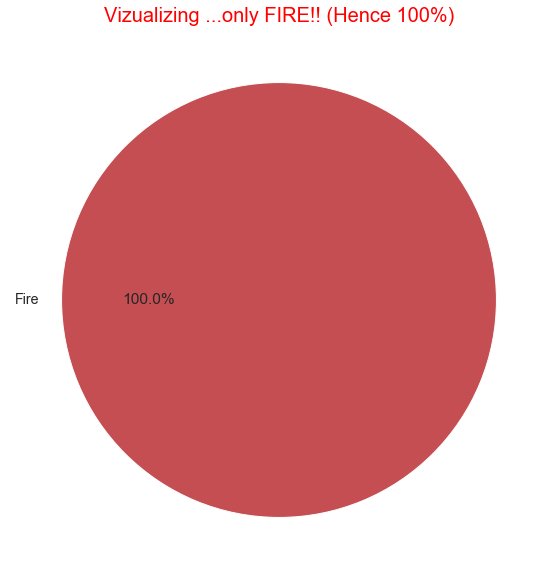

In [24]:
plt.figure(figsize=(10,10))
df_fire = df_data[df_data['Declaration Type']=='Fire']
#df_disaster
plt.pie(df_fire['Disaster Type'].value_counts().values,labels=df_fire['Disaster Type'].value_counts().index,colors='red',autopct='%1.1f%%')
plt.title("Vizualizing ...only FIRE!! (Hence 100%)",fontsize = 20,color = 'red')

# Task 5:

Use Weka to 
1) Find out how to convert the used dataset in weka format 
2) Convert it 
3) use the weka visualizer to produce some graphs.

In [22]:
# 20 point
#########################begin code for Task 5
# Please refer Screenshots.
#########################end code for Task 5